<a href="https://colab.research.google.com/github/Edoz926/ML_Works/blob/master/GFT_Poli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://www.tc-web.it/wp-content/uploads/2019/01/GFT-HiRes.jpg)




# **GFT al Poli!**

Vi chiedo la cortesia di compilarmi questo veloce questionario:

# http://www.poll-maker.com/QSGCT2D

Grazie!

## **Scelta immagini**


Per tornare a quanto discusso fino ad ora, è necessario perlomeno l'utilizzo di uno strumento per discernere che tipo di immagine dovremo lavorare: ***quindi inizialmente selezionare quali immagini saranno davvero UTILI***

**Si tratta di un'operazione molto importante, visto che più o meno tutti abbiamo uno smartphone (e questo google lo sa bene) con cui fare una foto.**

# **I Casi**

## - Interni e Esterni da lontano
![alt text](https://scontent-mxp1-1.xx.fbcdn.net/v/t1.0-9/61379009_1580346742095853_7220457829851725824_n.jpg?_nc_cat=111&_nc_sid=8024bb&_nc_ohc=tULDEO_WovIAX_GZeOj&_nc_ht=scontent-mxp1-1.xx&oh=0243c30988d21bcb08a8a2708886935c&oe=5E9AC8D3)


---
## - ...O in dettaglio 
![alt text](https://image.shutterstock.com/image-photo/car-details-collage-600w-216300610.jpg)
---
## - Pezzi, Meccanica e scottoscocca
![alt-text](http://3.citynews-foggiatoday.stgy.ovh/~media/original-hi/29462227680952/auto-smontate-4.jpg)
---
## - Documenti?
![alt text](https://www.poliziadistato.it/statics/04/dumenti-di-viaggio550x245.jpg?art=1)




# Scarichiamo le immagini

In [0]:
!wget --no-check-certificate "https://drive.google.com/uc?export=download%5E&id=1UfQOBEcbjxwb9jYCgRomWcNsMSZKLWgk" -O caso.zip
!wget --no-check-certificate "https://drive.google.com/uc?export=download%5E&id=1EfHv8sbB76j5-_xLB7ZMu3R7yVH2q_PV" -O caso2.zip


--2020-03-24 00:22:08--  https://drive.google.com/uc?export=download%5E&id=1UfQOBEcbjxwb9jYCgRomWcNsMSZKLWgk
Resolving drive.google.com (drive.google.com)... 172.217.13.78, 2607:f8b0:4004:808::200e
Connecting to drive.google.com (drive.google.com)|172.217.13.78|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-60-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lcakktqhi0qoke3emh3oc1kodugn7o7o/1585009275000/08882149072583366499/*/1UfQOBEcbjxwb9jYCgRomWcNsMSZKLWgk?e=download%5E [following]
--2020-03-24 00:22:10--  https://doc-0g-60-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lcakktqhi0qoke3emh3oc1kodugn7o7o/1585009275000/08882149072583366499/*/1UfQOBEcbjxwb9jYCgRomWcNsMSZKLWgk?e=download%5E
Resolving doc-0g-60-docs.googleusercontent.com (doc-0g-60-docs.googleusercontent.com)... 172.217.5.225, 2607:f8b0:4004:804::2001
Connecting to doc-0g-60-docs.googleusercontent.com (doc-0g-60

In [0]:
from zipfile import ZipFile
with ZipFile('caso.zip', 'r') as zipObj:
   zipObj.extractall('caso')
with ZipFile('caso2.zip', 'r') as zipObj:
   zipObj.extractall('caso2')

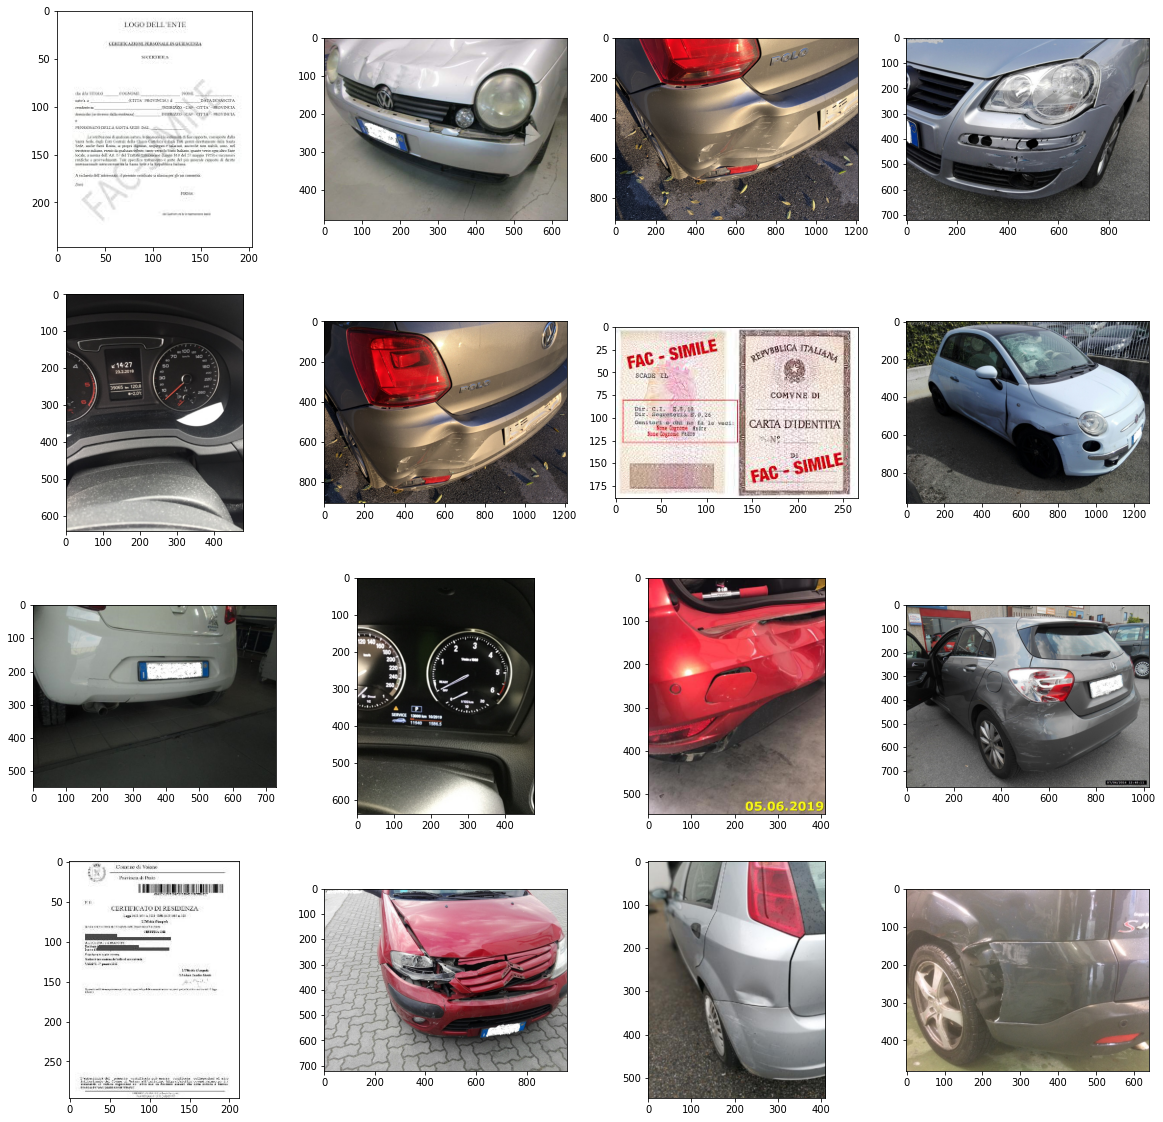

In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = '/content/caso'
files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f)) and f.endswith(('jpg','JPG'))]

w=20
h=20

fig=plt.figure(figsize=(w, h))

for i in range(0,len(files)):
    image = mpimg.imread(path+'/'+files[i])
    fig.add_subplot(4, 4, i+1)
    plt.imshow(image)
plt.show()

# ***COME FARE?***

Beh, tipico problema di ***classificazione***!

Prendiamo le immagini del pacchetto che ci è arrivato: controlliamo che all'interno vi sia almeno una **auto** e non molto altro

Procediamo all'import di un modello PRE-ALLENATO su il dataset IMAGENET (http://www.image-net.org/)

Comprende **1000** classi di allenamento tra cui le seguenti:
- beach wagon, station wagon, wagon, estate car
- racer, race car, racing car, sports car, sport car,street car 

Importo il modello preaddestrato, in particolare la CNN RESNET 50


In [0]:
%tensorflow_version 1.x
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications.resnet_v2 import ResNet50V2,decode_predictions
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam


base_model=ResNet50V2(weights='imagenet',include_top=True) 


Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

102875136/102869336 [==============================] - 1s 0us/step


## Summary del modello

In [0]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

## Previsione

In [0]:
from keras.preprocessing.image import load_img,img_to_array

for file in os.listdir('/content/caso'):
  image = load_img('/content/caso/' + file )

  target_size = [224,224]

  image = image.resize(target_size)
  image = img_to_array(image) / 255
  image = np.expand_dims(image, axis=0)

  preds = base_model.predict(image)
  print('File ',file, ', Predicted:', decode_predictions(preds, top=5))


40960/35363 [==================================] - 0s 0us/step
File  Z.jpg , Predicted: [[('n06359193', 'web_site', 0.879586), ('n07565083', 'menu', 0.08917541), ('n07248320', 'book_jacket', 0.0031387259), ('n02840245', 'binder', 0.002463707), ('n06785654', 'crossword_puzzle', 0.0019522693)]]
File  19271_2_23758.JPG.jpg , Predicted: [[('n03459775', 'grille', 0.21813606), ('n03100240', 'convertible', 0.21572241), ('n03769881', 'minibus', 0.2061062), ('n03770679', 'minivan', 0.113207765), ('n02930766', 'cab', 0.10045053)]]
File  IMG_2484.jpg , Predicted: [[('n03791053', 'motor_scooter', 0.38220707), ('n03584829', 'iron', 0.12485009), ('n04517823', 'vacuum', 0.12022057), ('n04252077', 'snowmobile', 0.11102627), ('n04285008', 'sports_car', 0.050011504)]]
File  DN471TT_7602362.JPG.jpg , Predicted: [[('n03459775', 'grille', 0.6494823), ('n03770679', 'minivan', 0.1794105), ('n03100240', 'convertible', 0.08481011), ('n03930630', 'pickup', 0.04354116), ('n02814533', 'beach_wagon', 0.0073025133

#**Riconoscimento Veicolo**



Perfetto! Abbiamo selezionato le foto che ci interessano, quelle degli esterni e non degli interni.

In [0]:
pip install imageai

     |████████████████████████████████| 184kB 22.7MB/s 


La lista di oggetti rintracciabili è la seguente:

person, bicycle,  car, motorcycle, airplane, bus, train,  truck,  boat,  traffic light,  fire hydrant, stop_sign,
parking meter,   bench,   bird,   cat,   dog,   horse,   sheep,   cow,   elephant,   bear,   zebra,
giraffe,   backpack,   umbrella,   handbag,   tie,   suitcase,   frisbee,   skis,   snowboard,
sports ball,   kite,   baseball bat,   baseball glove,   skateboard,   surfboard,   tennis racket,
bottle,   wine glass,   cup,   fork,   knife,   spoon,   bowl,   banana,   apple,   sandwich,   orange,
broccoli,   carrot,   hot dog,   pizza,   donot,   cake,   chair,   couch,   potted plant,   bed,
dining table,   toilet,   tv,   laptop,   mouse,   remote,   keyboard,   cell phone,   microwave,   oven,
toaster,   sink,   refrigerator,   book,   clock,   vase,   scissors,   teddy bear,   hair dryer,   toothbrush


In [0]:
from imageai.Detection import ObjectDetection
import os
import urllib

PRETRAINED_MODEL = '/content/caso/resnet50_coco_best_v2.0.1.h5'

URL_MODEL = 'https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/resnet50_coco_best_v2.0.1.h5'
urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

execution_path = '/content/caso'


detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath(os.path.join(execution_path , "resnet50_coco_best_v2.0.1.h5"))
detector.loadModel()

custom_objects = detector.CustomObjects(car=True, truck = True)

if not os.path.exists(os.path.join(execution_path,'OK')):
  os.mkdir(os.path.join(execution_path,'OK'))

files = [f for f in os.listdir(execution_path) if os.path.isfile(os.path.join(execution_path, f)) and f.endswith(('jpg','JPG'))]
for file in files:
    detections = detector.detectCustomObjectsFromImage(custom_objects=custom_objects, input_image=os.path.join(execution_path , file), output_image_path=os.path.join(execution_path,'OK', file), minimum_percentage_probability=30)

    for eachObject in detections:
        print(' Class: ', eachObject["name"] , " : ", eachObject["percentage_probability"], " : ", eachObject["box_points"] ,'     file: ',file )
        print("--------------------------------")


tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_1:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_2:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_3:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_4:0' shape=(9, 4) dtype=float32> anchors
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
 Class:  car  :  95.13802528381348  :  [4, -2, 619, 415]      file:  19271_2_23758.JPG.jpg
--------------------------------
 Class:  truck  :  34.324389696121216  :  [2, -5, 1213, 775]      file:  IMG_2484.jpg
--------------------------------
 Class:  car  :  40.21337032318115  :  [48, 1, 1228, 784]      file:  IMG_2484.jpg
--------------------------------
 Class:  car  :  92.16058850288391  :  [-2, 2, 960, 664]      file:  DN471TT_7602362.JPG.jpg
--------------------------------
 Class:  car  :  53.49538326263428  :  [-14, 6, 1204, 863

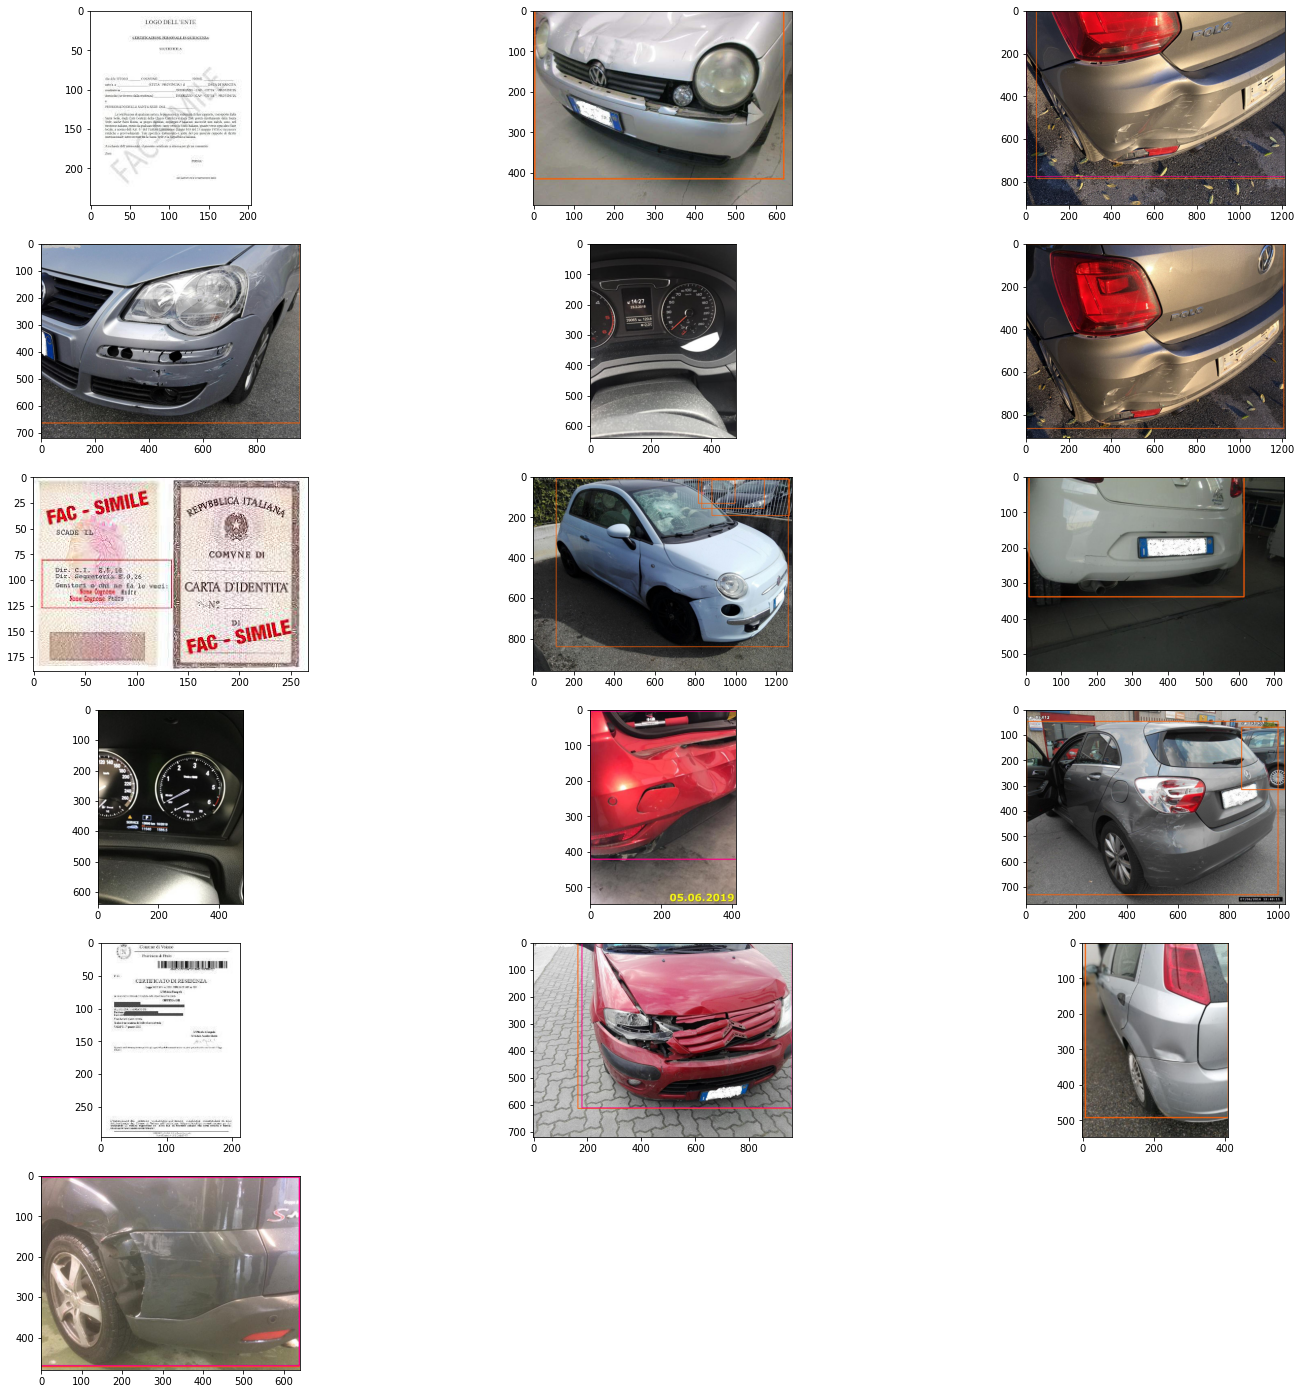

In [0]:
path = '/content/caso/OK'
files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f)) and f.endswith(('jpg','JPG'))]

w=25
h=25

fig=plt.figure(figsize=(w, h))

for i in range(0,len(files)):
    image = mpimg.imread(path+'/'+files[i])
    fig.add_subplot(6, 3, i+1)
    plt.imshow(image)
plt.show()

Con questo via possiamo identificare quello che è veramente il veicolo e tralasciare il resto.

I principali vantaggi sono: 

1.   Riduzione del rumore esterno all'immagine
2.   Velocità di processing negli step successivi
3.   Filtro ulteriore sulla selezione delle immagini -> non vengono selezionati documenti o altro tra le foto del pacchetto







# **STEP EXTRA: Recupero informazioni del Veicolo**

Per il recupero delle informazioni del veicolo è necessario quantomeno la targa del veicolo stesso.

Per questo è possibile utilizzare algoritmi classici di Visual Recognition per trovare la targa e sistemi di OCR per la lettura.

In realtà una società di assicurazioni queste informazioni le ha, ma lascio ad esempio il riferimento github di un progetto di questo tipo: https://github.com/Link009/LPEX 

# **Modello Posizionale**

La creazione di un modello posizionale è necessaria per validare i componenti trovati e indicarne se necessario quale sia stato impattato (vedi caso di componenti doppi come **Fanali** o **Proiettori**)

In [0]:
!wget --no-check-certificate "https://drive.google.com/uc?export=download%5E&id=1FGP87k8oHtubKwl4AJWuV2SjnyxzwEms" -O Posizionale_Posteriore.zip
with ZipFile('Posizionale_Posteriore.zip', 'r') as zipObj:
   zipObj.extractall()

--2020-03-24 00:23:14--  https://drive.google.com/uc?export=download%5E&id=1FGP87k8oHtubKwl4AJWuV2SjnyxzwEms
Resolving drive.google.com (drive.google.com)... 172.217.13.78, 2607:f8b0:4004:808::200e
Connecting to drive.google.com (drive.google.com)|172.217.13.78|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-60-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k3b43t1looi30ugu59tu6951g4l69s2v/1585009350000/08882149072583366499/*/1FGP87k8oHtubKwl4AJWuV2SjnyxzwEms?e=download%5E [following]
--2020-03-24 00:23:18--  https://doc-04-60-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k3b43t1looi30ugu59tu6951g4l69s2v/1585009350000/08882149072583366499/*/1FGP87k8oHtubKwl4AJWuV2SjnyxzwEms?e=download%5E
Resolving doc-04-60-docs.googleusercontent.com (doc-04-60-docs.googleusercontent.com)... 172.217.5.225, 2607:f8b0:4004:804::2001
Connecting to doc-04-60-docs.googleusercontent.com (doc-04-60

# **Costruiamo un modello posizionale**



## 1. Setting dei path e creazione di train, test e preprocessing

In [0]:
#@title Config
 %tensorflow_version 1.x
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import os.path
from os import path
from keras.applications.vgg16 import preprocess_input



#classifier = 'C_003_20190905_00'
#path_clas = 'C:/Users/A26V/Documents/Visual Recognition/Documenti Classificatore/Classificatori/'+classifier
#deve già esistere l'alberatura Train e Test

train_path = '/content/Posizionale_posteriore/train'
test_path = '/content/Posizionale_posteriore/validation'
#val_path = '/content/drive/My Drive/Watson/Watson2/Validation'
pesi_path = '/content/Posizionale_posteriore/pesi'

if not os.path.isdir(pesi_path):
    os.mkdir(pesi_path)

batch_size = 16
image_size = 224
num_class = len(listdir(train_path))
 
lista = listdir(train_path)
lista.sort()

#Preprocessing list

## height_shift_range: Float (fraction of total height). Range for random vertical shifts.
## fill_mode: One of {"constant", "nearest", "reflect" or "wrap"}. Points outside the boundaries of the input are filled according to the given mode:
## "constant": kkkkkkkk|abcd|kkkkkkkk (cval=k)
## "nearest":  aaaaaaaa|abcd|dddddddd
## "reflect":  abcddcba|abcd|dcbaabcd
## "wrap":  abcdabcd|abcd|abcdabcd

## width_shift_range: Float (fraction of total width). Range for random horizontal shifts.

## shear_range: Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)

## zoom_range: Float or [lower, upper]. Range for random zoom. 
## If a float,  [lower, upper] = [1-zoom_range, 1+zoom_range].



train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)#,
                                   #shear_range=0.2
                                   #zoom_range=[0.1,0.4],
                                   #height_shift_range=0.2,fill_mode="constant"
                                   #width_shift_range=0.25,
                                   #horizontal_flip=True,
                                   #vertical_flip=True)

train_generator = train_datagen.flow_from_directory(
                        directory=train_path,
                        target_size=(image_size,image_size),
                        batch_size=batch_size,
                        classes = lista,
                        color_mode='rgb',
                        shuffle=True)


#Se volessi un fixed validation set (da cartella)

validation_datagen = ImageDataGenerator(
     preprocessing_function=preprocess_input)

validation_generator = validation_datagen.flow_from_directory(
    test_path,
    shuffle=False,
    batch_size=batch_size,
    classes = lista,
    target_size=(image_size,image_size),
    color_mode = 'rgb'
    #seed=42)
    )


Found 119 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


## 2. Creazione del modello via Transfer Learning

Resnet50

In [0]:
#@title Resnet50
import keras
from keras.models import Model, load_model
from keras.layers import Activation, Dropout, Flatten, Dense,GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet_v2 import ResNet50V2


# base_model=MobileNet(weights='imagenet',include_top=False) 
base_model = ResNet50V2(weights='imagenet', include_top=False)

# Addestro solamente gli ultimi layer
for layer in base_model.layers[:20]:
    layer.trainable = False
# for i in range(len(base_model.layers)):
#     if str.startswith(model.layers[i].name, 'bn'):
#         model.layers[i].trainable=True

# Aggiungo i layer finali
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x) 
x = Dense(1024, activation='relu')(x) 
preds=Dense(num_class,activation='softmax')(x)
model=Model(inputs=base_model.input,outputs=preds)

# Summary del modello
model.summary()
tipo_rete= 'resnet50V2'

94674944/94668760 [==============================] - 1s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, None, None, 6 0           conv1_conv[0][0]                 
___________________________

VGG16

In [0]:
#@title VGG16
import keras
from keras.models import Model, load_model
from keras.layers import Activation, Dropout, Flatten, Dense,GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
#from keras.applications import InceptionV3


#Load the VGG model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

print(base_model.summary())

# Freeze the layers 
for layer in base_model.layers[:10]:
    layer.trainable = False

#Umberto
# Aggiungo i layer finali
x=base_model.output
x=Flatten()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
preds=Dense(num_class,activation='softmax')(x)


model=Model(inputs=base_model.input,outputs=preds)
    
# # Create the model
# model = keras.models.Sequential()

#  # Add the vgg convolutional base model
# model.add(base_model)
 
#  # Add new layers
# model.add(GlobalAveragePooling2D())
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(512,activation='relu'))
# model.add(Dense(num_class, activation='softmax'))
 
#  # Show a summary of the model. Check the number of trainable parameters    
print(model.summary())
tipo_rete= 'VGG16'



58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

## 3. Compilazione e Training

In [0]:
#@title Training
# Compile the model
from datetime import date
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ModelCheckpoint

model.compile(loss='categorical_crossentropy',               #'categorical_crossentropy','sparse_categorical_crossentropy'
          optimizer=SGD(lr = 0.001),
          metrics=['accuracy'])                              #Adam come sostituto del metodo, per il binary:  binary_crossentropy


validation_generator.reset()
epoche = 100
early_stopping_callback = EarlyStopping(monitor='val_acc', patience=60)
checkpoint_callback = ModelCheckpoint(pesi_path+'/'+str(date.today())+'_'+tipo_rete+'_val_best_'+str(len(lista))+'cl.h5',
                                      monitor='val_acc', verbose=1, save_best_only=True, mode='max')

history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.n/batch_size,
        validation_data=validation_generator,
        # workers=1,                        # maximum number of processes to spin up when using process-based threading
        # use_multiprocessing=False,
        validation_steps=validation_generator.n/batch_size,
        epochs=epoche,
        callbacks=[early_stopping_callback, checkpoint_callback])

#Se si vuole avere il validation set fisso, inserire nella history:
# , validation_steps=10 (Opzionale) 


# summarize history for accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

Epoch 1/100
8/7 [================================] - 5s 668ms/step - loss: 11.1604 - accuracy: 0.3613 - val_loss: 1.1847 - val_accuracy: 0.3667
Epoch 2/100
1/7 [===>..........................] - ETA: 0s - loss: 1.1154 - accuracy: 0.3750

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


8/7 [================================] - 1s 168ms/step - loss: 1.1296 - accuracy: 0.3361 - val_loss: 1.1604 - val_accuracy: 0.3000
Epoch 3/100
8/7 [================================] - 2s 207ms/step - loss: 1.1005 - accuracy: 0.3361 - val_loss: 1.0934 - val_accuracy: 0.3667
Epoch 4/100
8/7 [================================] - 2s 215ms/step - loss: 1.0605 - accuracy: 0.4202 - val_loss: 1.2969 - val_accuracy: 0.3667
Epoch 5/100
8/7 [================================] - 2s 202ms/step - loss: 1.0449 - accuracy: 0.3866 - val_loss: 1.0765 - val_accuracy: 0.4333
Epoch 6/100
8/7 [================================] - 2s 199ms/step - loss: 1.0591 - accuracy: 0.4118 - val_loss: 2.2491 - val_accuracy: 0.3333
Epoch 7/100
8/7 [================================] - 2s 200ms/step - loss: 1.0913 - accuracy: 0.4622 - val_loss: 1.2273 - val_accuracy: 0.6333
Epoch 8/100
8/7 [================================] - 2s 204ms/step - loss: 1.0430 - accuracy: 0.4034 - val_loss: 1.1083 - val_accuracy: 0.5000
Epoch 9/100

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-9d5c52042640>", line 25, in <module>
    callbacks=[early_stopping_callback, checkpoint_callback])
  File "/usr/local/lib/python3.6/dist-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training.py", line 1732, in fit_generator
    initial_epoch=initial_epoch)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py", line 185, in fit_generator
    generator_output = next(output_generator)
  File "/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py", line 610, in get
    inputs = future.get(timeout=30)
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 638, in get
    self.wait(timeout)
  File "/usr/lib/python3.6/multiprocess

KeyboardInterrupt: ignored

## 4. Confusion Matrix su Validation Set 

In [0]:
#@title Validation test
#from keras.applications.mobilenet import preprocess_input
import pandas as pd
model = load_model('/content/Posizionale_posteriore/pesi/2020-03-23_VGG16_val_best_3cl.h5')
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)  #included in our dependencies
batch_s = 16

# ATTENZIONE A IMPOSTARE SHUFFLE = False per generare correttamente 
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=batch_s,
    classes= lista,
    shuffle=False)



# Score valutazione del modello (interno a Keras)
score = model.evaluate_generator(test_generator,test_generator.n/batch_s,  verbose = 1)

# AZZERARE SEMPRE IL GENERATOR
test_generator.reset()

# Eseguo la predizione
scores = model.predict_generator(test_generator,test_generator.n/batch_s, verbose = 1)

print("Accuratezza valutata (keras): " + str(score[1]))

y_pred = np.argmax(scores, axis=1)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

print('Classification Report')
target_names = lista
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

print('Accuracy score (sklearn) :\n',accuracy_score(test_generator.classes,y_pred)) 

# **Object detection**

Per la creazione dei tag necessari alla costruzione di un Object detector, prendiamo in considerazione due diversi strumenti:



1.   ### **LabelImg** (https://github.com/tzutalin/labelImg)
Versione Windows/Linux: https://tzutalin.github.io/labelImg/
2.   ### **Vgg Image Annotator** (http://www.robots.ox.ac.uk/~vgg/software/via/)

Il primo permette una rapida e veloce taggatura delle immagini tramite bounding boxes classiche in formato Pascal Vox (.xml) o file di testo

![alt text](https://raw.githubusercontent.com/tzutalin/labelImg/master/demo/demo3.jpg)



---



Il secondo invece è uno strumento più completo e complesso, con la possibilità di taggare Audio, Video, Foto e altro, con Bounding Boxes o forme a poligoni più complesse (Polyline).

L'output in questo caso sarà un file Json



![alt text](http://www.robots.ox.ac.uk/~vgg/software/via/images/via_demo_screenshot2_via-2.0.2.jpg)



## **Modello Componenti**

Una volta trovata e centrata la visuale sulla macchina, dobbiamo rintracciare i componenti da analizzare con l'Object detection.


In [0]:
!wget --no-check-certificate "https://drive.google.com/uc?export=download%5E&id=188w8yV7eDqkNKxhjOa4_y74LnNczkA8g" -O OD_Posteriore.zip
with ZipFile('OD_Posteriore.zip', 'r') as zipObj:
   zipObj.extractall()

--2020-03-24 00:24:21--  https://drive.google.com/uc?export=download%5E&id=188w8yV7eDqkNKxhjOa4_y74LnNczkA8g
Resolving drive.google.com (drive.google.com)... 172.217.13.78, 2607:f8b0:4004:801::200e
Connecting to drive.google.com (drive.google.com)|172.217.13.78|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-60-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5crk590a1vmkmc5088q9iv9dqs5uso5m/1585009425000/08882149072583366499/*/188w8yV7eDqkNKxhjOa4_y74LnNczkA8g?e=download%5E [following]
--2020-03-24 00:24:24--  https://doc-0s-60-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5crk590a1vmkmc5088q9iv9dqs5uso5m/1585009425000/08882149072583366499/*/188w8yV7eDqkNKxhjOa4_y74LnNczkA8g?e=download%5E
Resolving doc-0s-60-docs.googleusercontent.com (doc-0s-60-docs.googleusercontent.com)... 172.217.5.225, 2607:f8b0:4004:804::2001
Connecting to doc-0s-60-docs.googleusercontent.com (doc-0s-60

Una comoda soluzione passa attraverso la repository Github **KERAS-RETINANET**       (https://github.com/fizyr/keras-retinanet.git)

In [0]:
!git clone https://github.com/fizyr/keras-retinanet.git

fatal: destination path 'keras-retinanet' already exists and is not an empty directory.


In [0]:
#install
%cd keras-retinanet/

!pip install . --user
!python setup.py build_ext --inplace
!pip install gdown
!pip install tensorflow-gpu==2.1
!pip install keras==2.3


/content/keras-retinanet
Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=170475 sha256=fbe8f9dc736557e911ee6aefe60ff6edc70a24202ebae95aa639c913ae6e288a
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
Successfully built keras-retinanet
  Found existing installation: keras-retinanet 0.5.1
    Uninstalling keras-retinanet-0.5.1:
      Successfully uninstalled keras-retinanet-0.5.1
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
running build_ext
skipping 'keras_retinanet/utils/compute_overlap.c' Cython extension (up-to-date)
copying build/lib.linux-x86_64-3.6/keras_retinanet/utils/compute_overlap.cpython-36m-x86_64-linux-gnu.so -> keras_retinanet/utils


In [0]:
#Import
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import urllib
import os
import csv
import cv2
import time
from PIL import Image

from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)


## Dati OD

In [0]:
path_images = '/content/OD_posteriore'

#Crea Annotazioni e Train e Test
ANNOTATIONS_FILE = path_images + '/annotations.csv'
TEST_FILE = path_images + '/test.csv'
CLASSES_FILE = path_images + '/classes.csv'

## Creo i file di annotazioni in formato csv

In [0]:
!python /content/OD_posteriore/xml_to_csv.py --path /content/OD_posteriore

Successfully converted xml to csv.
Successfully converted xml to csv.
Successfully converted xml to csv.


In [0]:
train_df = pd.read_csv(path_images + '/train_labels.csv')
test_df = pd.read_csv(path_images + '/test_labels.csv')

#to file 
train_df.to_csv(ANNOTATIONS_FILE, index=False, header=None)
test_df.to_csv(TEST_FILE, index=False, header=None)

In [0]:
classes = set(['4','5','6','7','8'])

with open(CLASSES_FILE, 'w') as f:
  for i, line in (enumerate(sorted(classes))):
    f.write('{},{}\n'.format(line,i))

---

### Carichiamo un set di pesi in formato .h5 (standard Keras) preallenati su Imagenet e facciamo partire il train

In [0]:
os.chdir('/content/keras-retinanet')
PRETRAINED_MODEL = './snapshots/_pretrained_model.h5'

URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

Downloaded pretrained model to ./snapshots/_pretrained_model.h5


In [0]:
!python keras_retinanet/bin/train.py --freeze-backbone --random-transform --weights {PRETRAINED_MODEL} --compute-val-loss --batch-size 2 --steps 50 --epochs 10 csv "/content/OD_posteriore/annotations.csv" "/content/OD_posteriore/classes.csv"  

Using TensorFlow backend.
Creating model, this may take a second...
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1316: UserWarning: Skipping loading of weights for layer classification_submodel due to mismatch in shape ((3, 3, 256, 45) vs (720, 256, 3, 3)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1316: UserWarning: Skipping loading of weights for layer classification_submodel due to mismatch in shape ((45,) vs (720,)).
  weight_values[i].shape))
2020-03-24 00:25:45.047642: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-03-24 00:25:45.051286: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-03-24 00:25:45.051552: I tensorflow/

In [0]:
os.chdir('/content/keras-retinanet')

!ls snapshots

model_path = os.path.join('snapshots', sorted(os.listdir('snapshots'), reverse=True)[0])
print(model_path)

model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)

labels_to_names = pd.read_csv(CLASSES_FILE, header=None).T.loc[0].to_dict()

_pretrained_model.h5  resnet50_csv_04.h5  resnet50_csv_08.h5
resnet50_csv_01.h5    resnet50_csv_05.h5  resnet50_csv_09.h5
resnet50_csv_02.h5    resnet50_csv_06.h5  resnet50_csv_10.h5
resnet50_csv_03.h5    resnet50_csv_07.h5
snapshots/resnet50_csv_10.h5


### Previsioni

In [0]:
def predict(image):
  image = preprocess_image(image.copy())
  image, scale = resize_image(image)

  boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(image, axis=0)
  )

  boxes /= scale

  return boxes, scores, labels

THRES_SCORE = 0.20


def draw_detections(image, boxes, scores, labels):
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    if score < THRES_SCORE:
        break

    color = label_color(label)

    b = box.astype(int)
    draw_box(image, b, color=color)

    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(image, b, caption)

def show_detected_objects(image_row):
  img_path = image_row.image_name
  
  image = read_image_bgr(img_path)

  boxes, scores, labels = predict(image)

  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  true_box = [
    image_row.x_min, image_row.y_min, image_row.x_max, image_row.y_max
  ]
  draw_box(draw, true_box, color=(255, 255, 0))

  draw_detections(draw, boxes, scores, labels)

  plt.axis('off')
  plt.imshow(draw)
  plt.show()

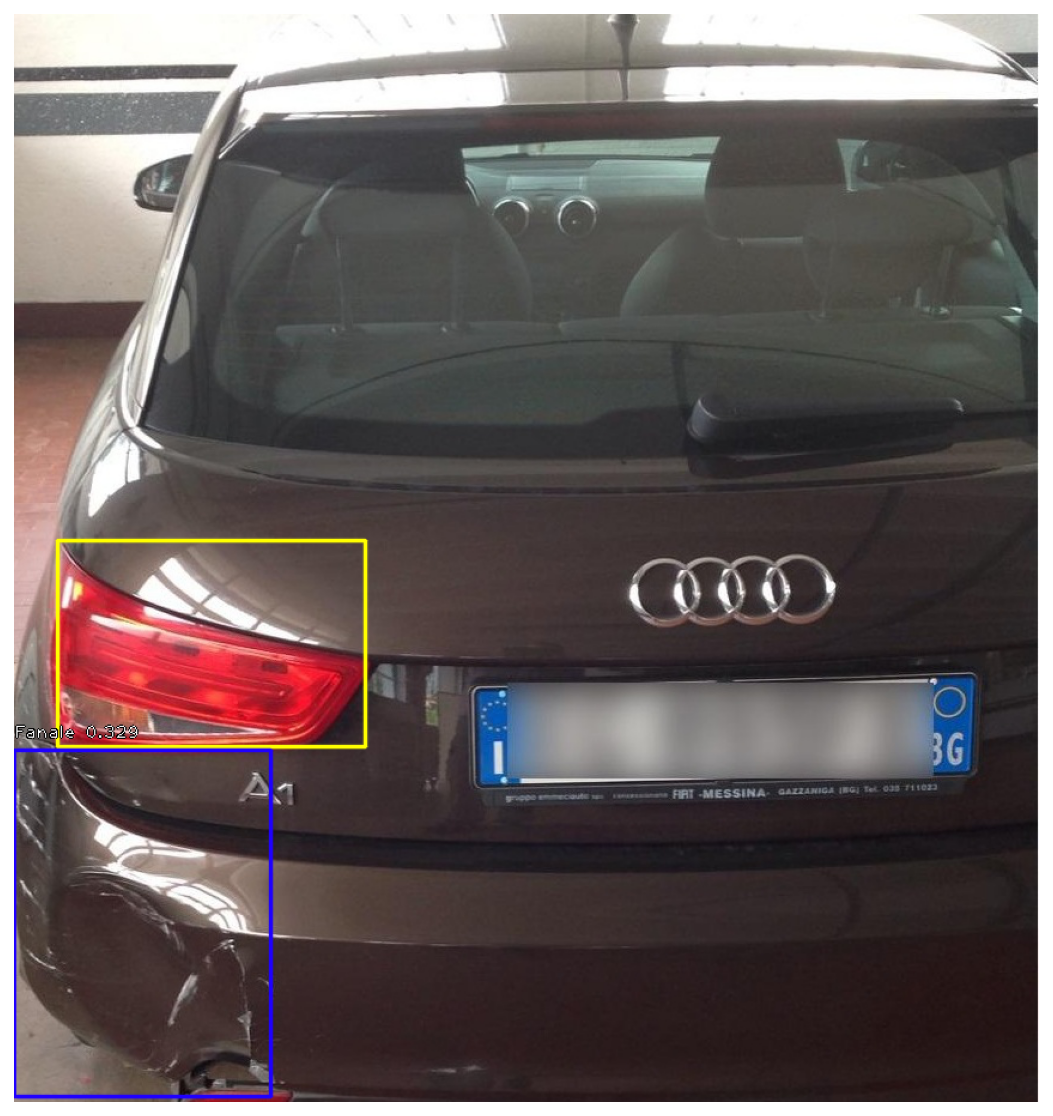

In [0]:
show_detected_objects(test_df.iloc[0])

## **Modello Danni**

Si uniscono le informazioni del modello danni per andare a creare 

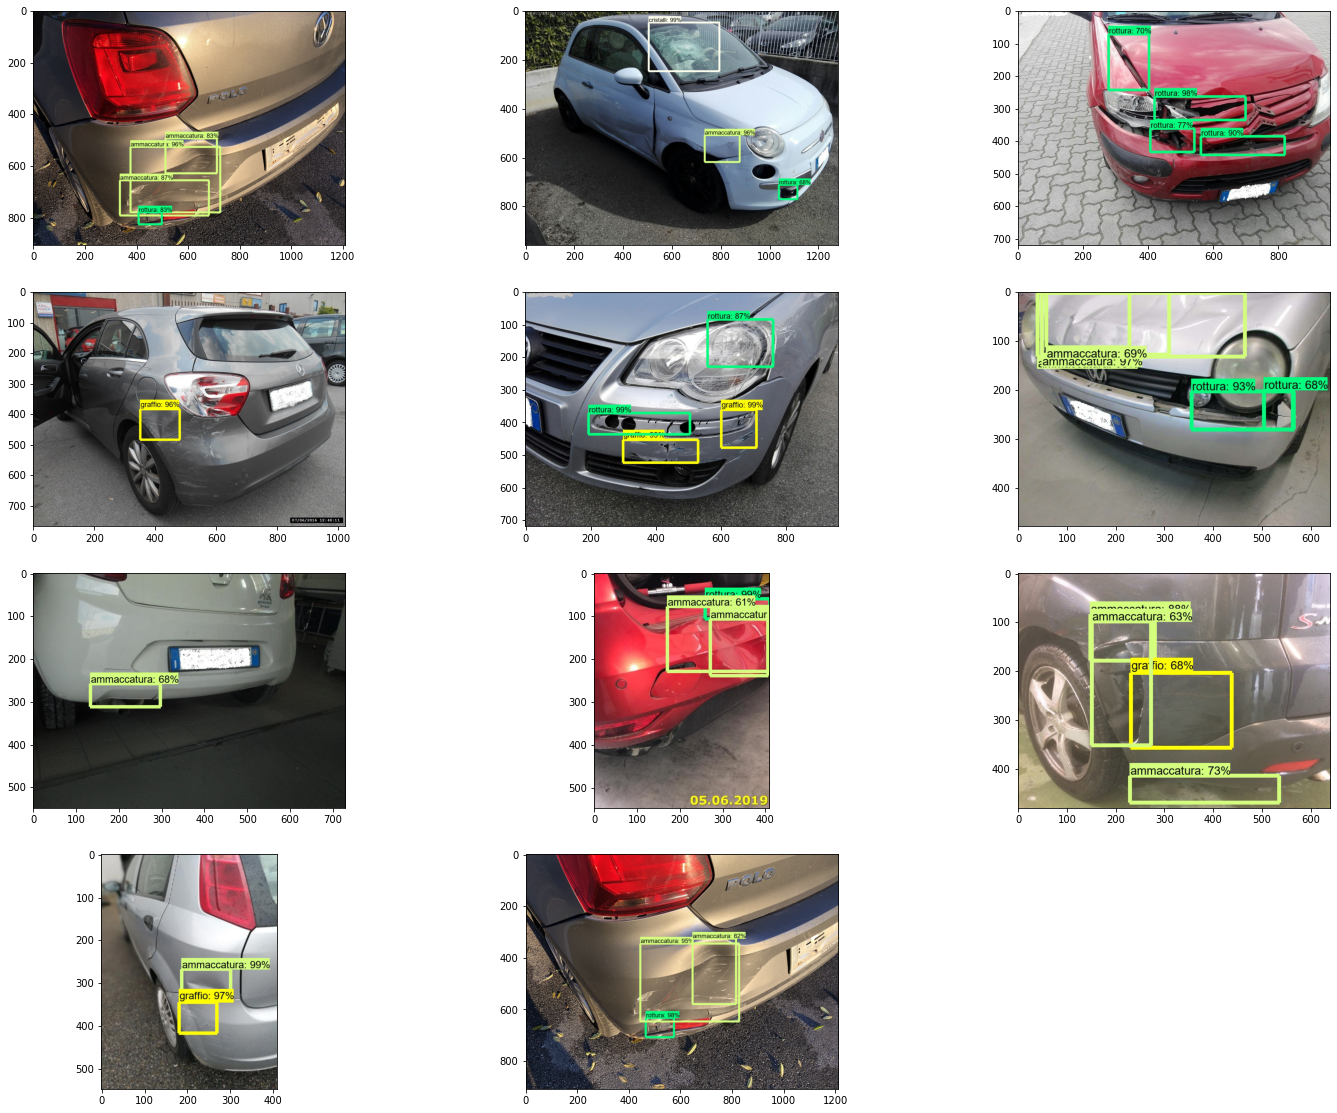

In [0]:
path = '/content/caso2'
files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f)) and f.endswith(('jpg','JPG'))]

w=25
h=25

fig=plt.figure(figsize=(w, h))

for i in range(0,len(files)):
    image = mpimg.imread(path+'/'+files[i])
    fig.add_subplot(5, 3, i+1)
    plt.imshow(image)
plt.show()